# Import Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
salary = pd.read_csv('ds_salaries.csv')

## Drop unwanted column

In [3]:
salary.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
salary.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


---

# Checking Dataset

In [5]:
salary.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [6]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


In [7]:
salary.shape

(607, 11)

---

**Average of Data Science Job Salaries (USD)**

In [8]:
salary['salary_in_usd'].mean()

112297.86985172982

**Maximum Data Science Job Salaries (USD)**

In [9]:
salary['salary_in_usd'].max()

600000

**Minimum Data Science Job Salaries (USD)**

In [10]:
salary['salary_in_usd'].min()

2859

**Information of people who get the most Salaries (USD)**

In [11]:
salary[salary['salary_in_usd'] == salary['salary_in_usd'].max()]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
252,2021,EX,FT,Principal Data Engineer,600000,USD,600000,US,100,US,L


**Information of people who get the least Salaries (USD)**

In [12]:
salary[salary['salary_in_usd'] == salary['salary_in_usd'].min()]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
176,2021,MI,FT,Data Scientist,58000,MXN,2859,MX,0,MX,S


**Amount of data kept in years**

In [13]:
salary['work_year'].value_counts()

2022    318
2021    217
2020     72
Name: work_year, dtype: int64

<AxesSubplot:xlabel='work_year', ylabel='count'>

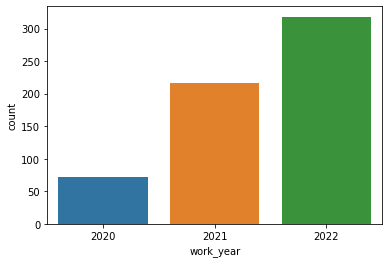

In [14]:
sns.countplot(x='work_year',data=salary)

**Data Science Job Average Salaries Per Year (USD)**

In [15]:
salary_per_year = salary.groupby('work_year').mean()['salary_in_usd'].reset_index().sort_values(by='salary_in_usd')
salary_per_year

,work_year,salary_in_usd
0,2020,95813.000000
1,2021,99853.792627
2,2022,124522.006289


Text(0, 0.5, 'Number of Average Salary in USD')

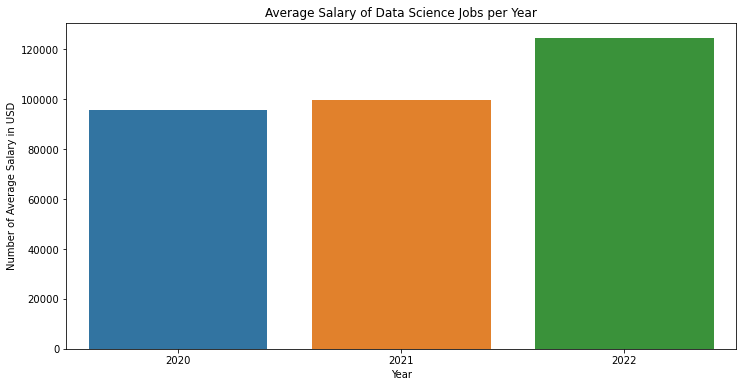

In [16]:
plt.figure(figsize=(12,6))
plt.title("Average Salary of Data Science Jobs per Year")
sns.barplot(x=salary_per_year['work_year'], y=salary_per_year['salary_in_usd'])
plt.xlabel("Year")
plt.ylabel("Number of Average Salary in USD")

<AxesSubplot:xlabel='work_year', ylabel='salary_in_usd'>

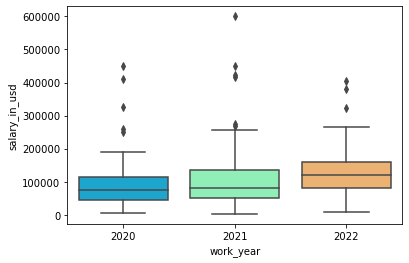

In [17]:
sns.boxplot(x='work_year',y='salary_in_usd',data=salary,palette='rainbow')

<AxesSubplot:xlabel='work_year', ylabel='salary_in_usd'>

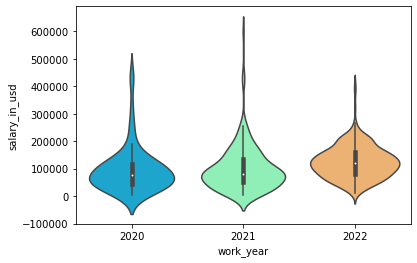

In [18]:
sns.violinplot(x='work_year',y='salary_in_usd',data=salary,palette='rainbow')

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='salary_in_usd', ylabel='Density'>

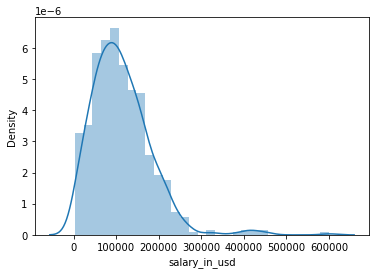

In [19]:
sns.distplot(salary['salary_in_usd'])

**Amount of Data Science Job Titles**

In [20]:
salary['job_title'].nunique()

50

**List of Data Science Job Titles**

In [21]:
salary['job_title'].unique()

array(['Data Scientist', 'Machine Learning Scientist',
       'Big Data Engineer', 'Product Data Analyst',
       'Machine Learning Engineer', 'Data Analyst', 'Lead Data Scientist',
       'Business Data Analyst', 'Lead Data Engineer', 'Lead Data Analyst',
       'Data Engineer', 'Data Science Consultant', 'BI Data Analyst',
       'Director of Data Science', 'Research Scientist',
       'Machine Learning Manager', 'Data Engineering Manager',
       'Machine Learning Infrastructure Engineer', 'ML Engineer',
       'AI Scientist', 'Computer Vision Engineer',
       'Principal Data Scientist', 'Data Science Manager', 'Head of Data',
       '3D Computer Vision Researcher', 'Data Analytics Engineer',
       'Applied Data Scientist', 'Marketing Data Analyst',
       'Cloud Data Engineer', 'Financial Data Analyst',
       'Computer Vision Software Engineer',
       'Director of Data Engineering', 'Data Science Engineer',
       'Principal Data Engineer', 'Machine Learning Developer',
       

**Top 10 most Data Science Jobs**

In [22]:
salary['job_title'].value_counts().head(10)

Data Scientist                143
Data Engineer                 132
Data Analyst                   97
Machine Learning Engineer      41
Research Scientist             16
Data Science Manager           12
Data Architect                 11
Big Data Engineer               8
Machine Learning Scientist      8
Principal Data Scientist        7
Name: job_title, dtype: int64

**Top 10 Highest Average of Data Science Jobs**

In [23]:
salary.groupby('job_title').mean()['salary_in_usd'].reset_index().sort_values(['salary_in_usd'],ascending=False)\
.head(10)

,job_title,salary_in_usd
14,Data Analytics Lead,405000.000000
45,Principal Data Engineer,328333.333333
28,Financial Data Analyst,275000.000000
46,Principal Data Scientist,215242.428571
25,Director of Data Science,195074.000000
16,Data Architect,177873.909091
3,Applied Data Scientist,175655.000000
2,Analytics Engineer,175000.000000
23,Data Specialist,165000.000000
29,Head of Data,160162.600000


**Country of Company location that Data Science Employees are in**

In [24]:
salary['company_location'].nunique()

50

**Top 10 Country of Company location that Data Science Employees are in**

In [25]:
salary['company_location'].value_counts().head(10)

US    355
GB     47
CA     30
DE     28
IN     24
FR     15
ES     14
GR     11
JP      6
NL      4
Name: company_location, dtype: int64

**Top 10 Data Science Job Titles in US**

In [26]:
salary[(salary['company_location']=='US')]['job_title'].value_counts().head()

Data Engineer                85
Data Scientist               84
Data Analyst                 71
Machine Learning Engineer    16
Data Science Manager         10
Name: job_title, dtype: int64

In [27]:
salary['employee_residence'].value_counts().head(10)

US    332
GB     44
IN     30
CA     29
DE     25
FR     18
ES     15
GR     13
JP      7
PT      6
Name: employee_residence, dtype: int64

**Amount of Experience Level**

In [28]:
salary['experience_level'].value_counts()

SE    280
MI    213
EN     88
EX     26
Name: experience_level, dtype: int64

<AxesSubplot:xlabel='experience_level', ylabel='count'>

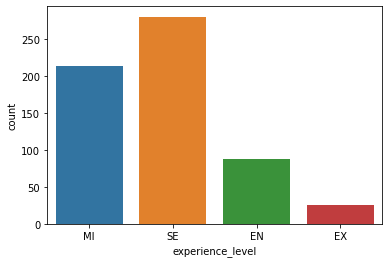

In [29]:
sns.countplot(x='experience_level', data=salary)

**Average Salary (USD) Based on Experience Level**

In [30]:
explvl_sal = salary.groupby('experience_level').mean()['salary_in_usd'].reset_index().sort_values(['salary_in_usd'])
explvl_sal

,experience_level,salary_in_usd
0,EN,61643.318182
2,MI,87996.056338
3,SE,138617.292857
1,EX,199392.038462


Text(0, 0.5, 'Number of Average Salary in USD')

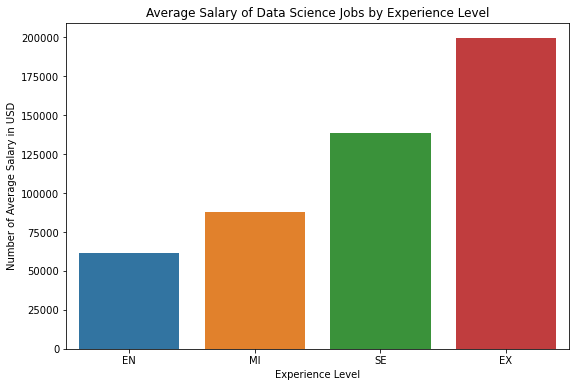

In [31]:
plt.figure(figsize=(9,6))
plt.title("Average Salary of Data Science Jobs by Experience Level")
sns.barplot(x=explvl_sal['experience_level'], y=explvl_sal['salary_in_usd'])
plt.xlabel("Experience Level")
plt.ylabel("Number of Average Salary in USD")

**Amount of Employment Type**

In [32]:
salary['employment_type'].value_counts()

FT    588
PT     10
CT      5
FL      4
Name: employment_type, dtype: int64

<AxesSubplot:xlabel='employment_type', ylabel='count'>

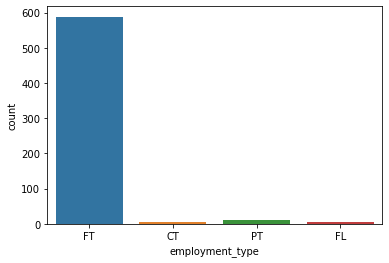

In [33]:
sns.countplot(x='employment_type', data=salary)

**Amount of Company Size**

In [34]:
salary['company_size'].value_counts()

M    326
L    198
S     83
Name: company_size, dtype: int64

<AxesSubplot:xlabel='company_size', ylabel='count'>

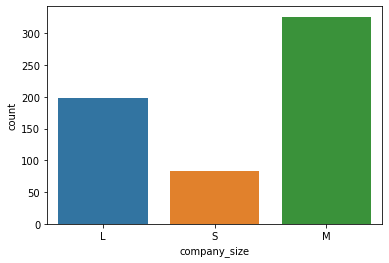

In [35]:
sns.countplot(x='company_size', data=salary)

**Average Salary (USD) based on Company Size**

In [36]:
mean_sal_com = salary.groupby('company_size').mean()['salary_in_usd'].reset_index()
mean_sal_com

,company_size,salary_in_usd
0,L,119242.994949
1,M,116905.466258
2,S,77632.674699


Text(0, 0.5, 'Number of Average Salary in USD')

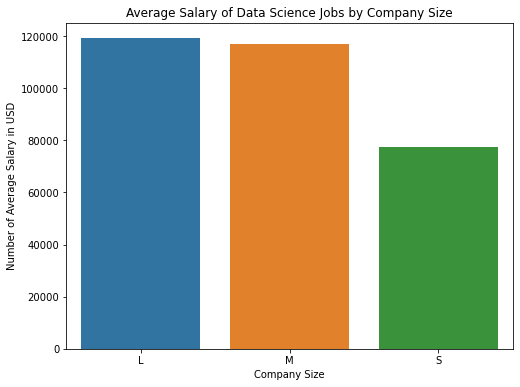

In [37]:
plt.figure(figsize=(8,6))
plt.title("Average Salary of Data Science Jobs by Company Size")
sns.barplot(x=mean_sal_com['company_size'], y=mean_sal_com['salary_in_usd'])
plt.xlabel("Company Size")
plt.ylabel("Number of Average Salary in USD")

**Top 10 Countries that Have Most Averaged Data Science Job Salaries**

In [38]:
ds_cntry_sal = salary.groupby('company_location').mean()['salary_in_usd'].reset_index().sort_values\
(['salary_in_usd'],ascending=False).head(10)
ds_cntry_sal

,company_location,salary_in_usd
43,RU,157500.000000
48,US,144055.261972
38,NZ,125000.000000
24,IL,119059.000000
29,JP,114127.333333
3,AU,108042.666667
0,AE,100000.000000
14,DZ,100000.000000
26,IQ,100000.000000
6,CA,99823.733333


According from ISO 3166-1 country codes
1. Russia
2. USA
3. New Zealand
4. Israel
5. Japan
6. Australia
7. United Arab Emirates
8. Algeria
9. Iraq
10. Canada

Text(0, 0.5, 'Number of Average Salary in USD')

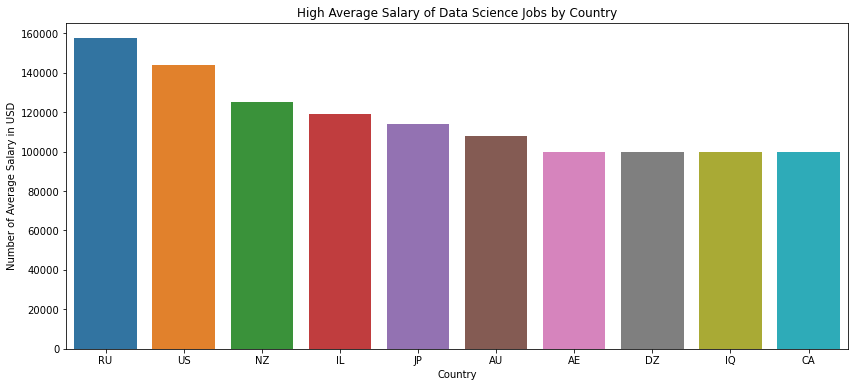

In [39]:
plt.figure(figsize=(14,6))
plt.title("High Average Salary of Data Science Jobs by Country")
sns.barplot(x=ds_cntry_sal['company_location'], y=ds_cntry_sal['salary_in_usd'])
plt.xlabel("Country")
plt.ylabel("Number of Average Salary in USD")

**Top 10 Countries that Have Least Averaged Data Science Job Salaries**

In [40]:
ds_cntry_sal2 = salary.groupby('company_location').mean()['salary_in_usd'].reset_index().sort_values\
(['salary_in_usd'],ascending=True).head(10)
ds_cntry_sal2

,company_location,salary_in_usd
49,VN,4000.000000
27,IR,4000.000000
30,KE,9272.000000
39,PK,13333.333333
47,UA,13400.000000
32,MD,18000.000000
1,AS,18053.000000
5,BR,18602.666667
20,HN,20000.000000
46,TR,20096.666667


According from ISO 3166-1 country codes
1. Vietnam
2. Iran
3. Kenya
4. Pakistan
5. Ukraine
6. Moldova
7. American Samoa
8. Brazil
9. Honduras
10. Turkey

Text(0, 0.5, 'Number of Average Salary in USD')

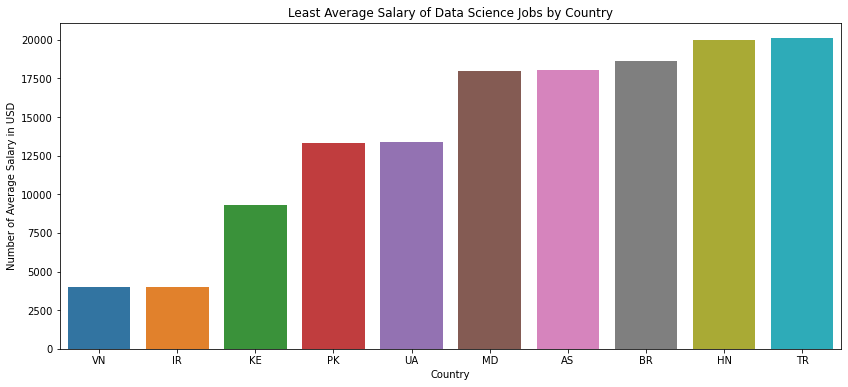

In [41]:
plt.figure(figsize=(14,6))
plt.title("Least Average Salary of Data Science Jobs by Country")
sns.barplot(x=ds_cntry_sal2['company_location'], y=ds_cntry_sal2['salary_in_usd'])
plt.xlabel("Country")
plt.ylabel("Number of Average Salary in USD")

**Amount of remote ratio work**

In [42]:
salary['remote_ratio'].value_counts()

100    381
0      127
50      99
Name: remote_ratio, dtype: int64

<AxesSubplot:xlabel='remote_ratio', ylabel='count'>

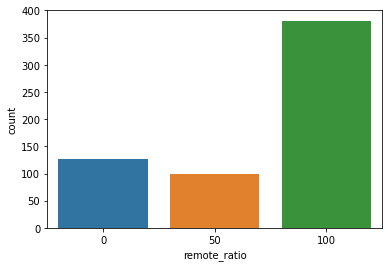

In [43]:
sns.countplot(x='remote_ratio', data=salary)